In [2]:
import quandl
import numpy as np
import pandas as pd
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)


In [3]:
#https://medium.com/@randerson112358/predict-stock-prices-using-python-machine-learning-53aa024da20a
# Get the stock data

quandl.ApiConfig.api_key = 'qKYyca8_q3vn5ws7FpwZ'


# Set start and end date for stock prices
start_date = datetime.date(2010, 1,1)
end_date = datetime.date.today()

df = quandl.get('FSE/SAP_X', start_date=start_date, end_date=end_date)
# Take a look at the data
#df.head()

#df = quandl.get_table('WIKI/PRICES', ticker = ['AAPL'], 
#                        qopts = { 'columns': ['date', 'adj_close'] }, 
#                       date = { 'gte': '2012-03-15', 'lte': '2018-03-15' }, 
#                        paginate=True)
df.to_csv('salesforce_stock.csv')

In [4]:
#df.set_index('date', inplace=True)
#df.head()
# Check data types in columns
#df.columns
df.head()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
Date,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,33.00,NaN,0.0,NaN,None,None,0.0
2010-01-04,32.88,33.17,32.53,32.94,NaN,3537806.0,116209631.0,None,None,NaN
2010-01-05,32.78,32.93,32.58,32.65,NaN,2907653.0,95146792.0,None,None,NaN
2010-01-06,32.74,33.30,32.62,33.23,NaN,3772263.0,124792582.0,None,None,NaN
2010-01-07,33.09,34.26,33.09,34.11,NaN,6331741.0,214212728.0,None,None,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2010-01-01 to 2019-07-30
Data columns (total 10 columns):
Open                     2100 non-null float64
High                     2433 non-null float64
Low                      2433 non-null float64
Close                    2434 non-null float64
Change                   11 non-null float64
Traded Volume            2388 non-null float64
Turnover                 2387 non-null float64
Last Price of the Day    0 non-null object
Daily Traded Units       0 non-null object
Daily Turnover           1 non-null float64
dtypes: float64(8), object(2)
memory usage: 209.2+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Daily Turnover
count,2100.000000,2433.000000,2433.000000,2434.000000,11.000000,2.388000e+03,2.387000e+03,1.0
mean,61.069781,66.155832,65.058307,65.627445,-0.070000,3.143664e+06,1.898611e+08,0.0
std,19.551782,21.745220,21.464232,21.627532,0.709761,1.918120e+06,9.925356e+07,NaN
min,31.400000,31.470000,30.910000,31.120000,-0.740000,0.000000e+00,1.767350e+05,0.0
25%,44.687500,49.900000,48.860000,49.507500,-0.500000,2.069530e+06,1.335389e+08,0.0
50%,57.900000,60.470000,59.550000,60.000000,-0.290000,2.703520e+06,1.686745e+08,0.0
75%,70.950000,84.960000,83.830000,84.500000,0.085000,3.652603e+06,2.181707e+08,0.0
max,124.860000,125.000000,123.480000,124.380000,1.250000,3.645671e+07,1.369431e+09,0.0


In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover',
       'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'],
      dtype='object')

In [8]:
# Create a new DataFrame with only closing price and date
data = pd.DataFrame(df, columns=['Close'])

# Reset index column so that we have integers to represent time for later analysis
data = data.reset_index()

In [9]:
data.head()

,Date,Close
0,2010-01-01,33.00
1,2010-01-04,32.94
2,2010-01-05,32.65
3,2010-01-06,33.23
4,2010-01-07,34.11


In [10]:

# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2010-01-01 to 2019-07-30
Data columns (total 10 columns):
Open                     2100 non-null float64
High                     2433 non-null float64
Low                      2433 non-null float64
Close                    2434 non-null float64
Change                   11 non-null float64
Traded Volume            2388 non-null float64
Turnover                 2387 non-null float64
Last Price of the Day    0 non-null object
Daily Traded Units       0 non-null object
Daily Turnover           1 non-null float64
dtypes: float64(8), object(2)
memory usage: 209.2+ KB


In [11]:
# Check for missing values in the columns
df.isna().values.any()

True

C:\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


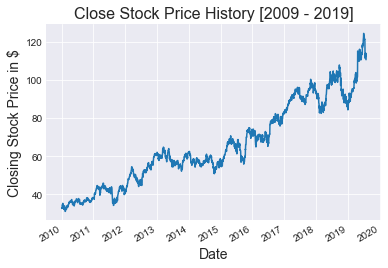

In [12]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(data['Date'], data['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [16]:
# SPLIT DATA TO TRAIN THE SET
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [17]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(data, test_size=0.20)

In [19]:
#Create and Train the Model

# Import package for linear model
from sklearn.linear_model import LinearRegression

In [20]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [21]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
#Model Evaluation

# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.02949555441595438
Intercept:  29.725784784037437


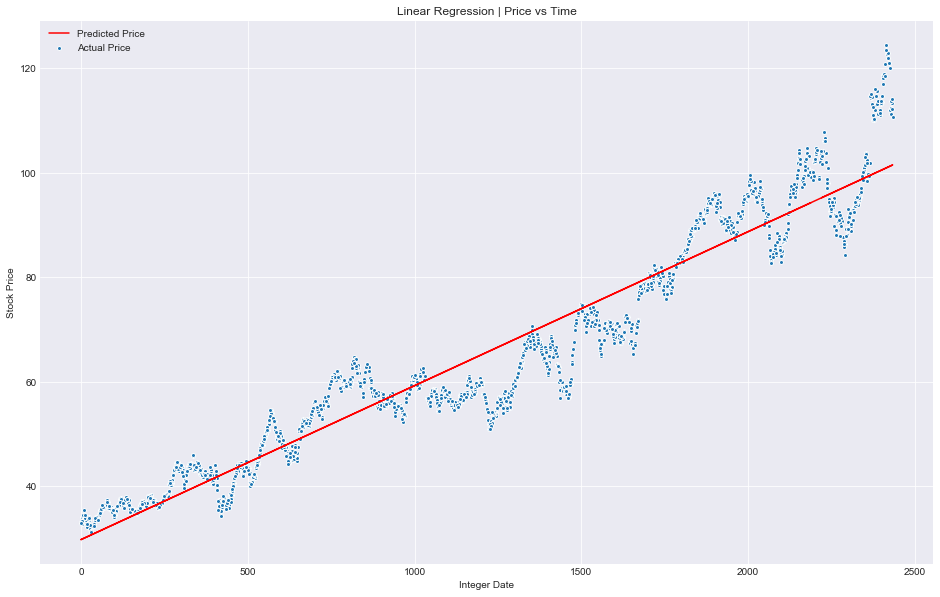

In [23]:

# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [34]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']


In [35]:
# Generate array with predicted values
y_pred = model.predict(X_test)

In [36]:
#### Regression Evaluation
#Let's check how the predicted values compare with the actual value on random sample from our data set.

In [37]:

# Get number of rows in data set for random sample
data.shape

(2434, 2)

In [39]:
# Generate 25 random numbers
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
data_sample = data[data.index.isin(randints)]


In [40]:
data_sample.head()


,Date,Close
54,2010-03-18,34.60
181,2010-09-15,36.59
196,2010-10-06,36.59
237,2010-12-02,36.30
330,2011-04-14,44.00


KeyError: "['Prediction'] not in index"

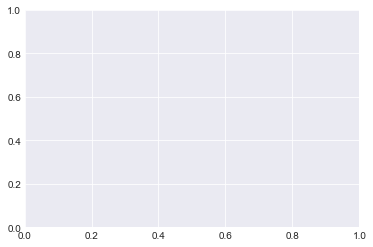

In [33]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
data_sample.plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

In [ ]:
# Get the Adjusted Close Price 
df = df[['Adj. Close']] 
# Take a look at the new data 
df.head()

In [ ]:
# A variable for predicting 'n' days out into the future
forecast_out = 10
#'n=30' days
#Create another column (the target ) shifted 'n' units up
df['prediction'] = df[['Adj. Close']].shift(-forecast_out)
#print the 12)
df.tail(15)

In [ ]:
#df1 = df.reset_index()

In [ ]:
#df1.head()

In [ ]:
#X = df1[['Date','Adj. Close']].values

#print(X)

In [ ]:

### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['prediction'],1))

#Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

In [ ]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(df['prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y)

In [ ]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

In [ ]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

In [ ]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

In [ ]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

In [ ]:
# Set x_forecast equal to the last 'n' rows of the original data set from adj_close column
x_forecast = np.array(df.drop(['prediction'],1))[-forecast_out:]
print(x_forecast)

In [ ]:
# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

In [ ]:
lr_prediction

In [ ]:
# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

In [ ]:
lr_prediction_df = pd.DataFrame({'Predicted_Price1':lr_prediction[:]})

In [ ]:
lr_prediction_df

# For Loops Option

In [ ]:
quandl.ApiConfig.api_key = 'qKYyca8_q3vn5ws7FpwZ'
quandl_stock_list = []
temp_date_list = []
temp_close_price_list = []
temp_stock_list = []
lr_prediction_list = []
svm_prediction_list = []
stock_list = ["GOOGL","AAPL"]
for x in stock_list:
    temp_stock = "WIKI/" + x
    quandl_stock_list.append(temp_stock)
    df = quandl.get(temp_stock, trim_start = "2017-03-15", trim_end ="2018-03-15")
    df = df[['Adj. Close']] 
    i = 0
    
    for index, row in df.iterrows():  
        temp_close_price = str(round(row['Adj. Close'],2))
        temp_date = str(df.index[i])
        temp_stock = x
        i = i + 1
        # print(temp_date + " " + temp_close_price)
           
        temp_date_list.append(temp_date)   
        temp_close_price_list.append(temp_close_price)
        temp_stock_list.append(temp_stock)
        
        stock_close_df = pd.DataFrame({"Stock Name": temp_stock_list})
        stock_close_df["Date"] = temp_date_list
        stock_close_df["Close Price"] = temp_close_price_list
        
        # Start predict
        forecast_out = 10
        df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)
        
        # Define X data set
        X = np.array(df.drop(['Prediction'],1))
        X = X[:-forecast_out]
        
        # Define Y data set
        y = np.array(df['Prediction'])
        y = y[:-forecast_out]
        
        # Split the data into 80% training and 20% testing
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        # Create and train the Support Vector Machine (Regressor) 
        svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.2) 
        svr_rbf.fit(x_train, y_train)
        
        # Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
        # The best possible score is 1.0
        svm_confidence = svr_rbf.score(x_test, y_test)
        #print("svm confidence: ", svm_confidence)
        
        # Create and train the Linear Regression  Model
        lr = LinearRegression()
        # Train the model
        lr.fit(x_train, y_train)
        
        lr_confidence = lr.score(x_test, y_test)
        x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
        
        # Prediction
        lr_prediction = lr.predict(x_forecast)
        svm_prediction = svr_rbf.predict(x_forecast)
        
        lr_prediction_list.append(lr_prediction)
        svm_prediction_list.append(svm_prediction)
        
        stock_close_df["LR_Prediction"] = lr_prediction_list
        stock_close_df["SVM_Prediction"] = svm_prediction_list
        



stock_close_df



In [ ]:
stock_close_df.to_csv('stock_close_df1.csv')

# Example of what the dataframe should look like

In [ ]:
example = pd.read_csv("EXAMPLE.csv")

In [ ]:
example